# Liquidity Risk and Expected Stock Returns (Pastor Stambaugh 2003)
*Replication study by Eric Vorkink and Andrew Williams*

*We will proceed in the following manner*

1. Replicate the data/measures in the sample that they use
2. Replicate main results/tables (not all tables will be replicated)
3. Test their measures and results moving forward

**Replicating Data/Measures in sample** 

In [1]:
## Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
pd.options.mode.chained_assignment = None  # default='warn'

C:\Users\ericv\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
## Reading in our liquidity measure that we created
## WE NEED TO ADD IN THE CODE THAT WE USED TO CREATE THIS
liq=pd.read_feather('C:\\Users\ericv\Box\School\Winter 2023\Fin 585R\Project\liq_data_updated.feather')
liq['vals']=liq['vals']*1000000
liq

,index,vals
0,10192610006,1.191493e-03
1,10192610022,1.342261e-02
2,10192610030,4.944852e-02
3,10192610049,-3.803185e-02
4,10192610057,NaN
...,...,...
3549131,9202293425,-2.938097e-04
3549132,9202293426,-5.287389e-03
3549133,9202293427,4.332515e-05
3549134,9202293429,-1.978194e-05


In [3]:
# Reading in monthly stock data from CRSP
#path = r"C:\\Users\ericv\Downloads\06-mstk_62-22 (1).csv"
path=r"C:\\Users\ericv\Downloads\crsp_monthly.csv"
df=pd.read_csv(path,parse_dates=['caldt'])
df

,permno,caldt,cusip,ticker,shrcd,excd,siccd,prc,ret,vol,shr,cumfacshr
0,10000,1986-01-31,68391610,OMFGA,10,3,3990,-4.37500,NaN,1771.0,3680.0,1.0
1,10000,1986-02-28,68391610,OMFGA,10,3,3990,-3.25000,-0.257143,828.0,3680.0,1.0
2,10000,1986-03-31,68391610,OMFGA,10,3,3990,-4.43750,0.365385,1078.0,3680.0,1.0
3,10000,1986-04-30,68391610,OMFGA,10,3,3990,-4.00000,-0.098592,957.0,3793.0,1.0
4,10000,1986-05-30,68391610,OMFGA,10,3,3990,-3.10938,-0.222656,1074.0,3793.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4776837,93436,2022-08-31,88160R10,TSLA,11,3,9999,275.61000,-0.072489,7322220.0,3133470.0,1.0
4776838,93436,2022-09-30,88160R10,TSLA,11,3,9999,265.25000,-0.037589,12965500.0,3158000.0,1.0
4776839,93436,2022-10-31,88160R10,TSLA,11,3,9999,227.54000,-0.142168,17325800.0,3157750.0,1.0
4776840,93436,2022-11-30,88160R10,TSLA,11,3,9999,194.70000,-0.144326,18824200.0,3157750.0,1.0


In [4]:
# We want all dates to be the last day of the month
df['caldt']=df['caldt'] + pd.offsets.MonthEnd(0) 

In [5]:
## Some date cleaning of our liquidity measure table - this will allow us a proper merge with CRSP data
liq['datepermno']=pd.to_numeric(liq['index'])
liq['permno']=pd.to_numeric(liq['datepermno'].astype(str).str[-5:])
liq['caldt']=pd.to_numeric(liq['datepermno'].astype(str).str[:-5])
liq['newdate']=liq['caldt'].astype(str).str[:-4] + '-' + liq['caldt'].astype(str).str[-4:]
liq['caldt']=pd.to_datetime(liq['caldt'])

In [6]:
liq['caldt']=pd.to_datetime(liq['newdate'])
liq['caldt']=liq['caldt'] + pd.offsets.MonthEnd(0) 

<ipython-input-6-697db353df9a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  liq['caldt']=pd.to_datetime(liq['newdate'])


In [7]:
liq=liq.drop(['index','datepermno','newdate'],axis=1)

In [8]:
liq=liq.sort_values(['permno','caldt']).reset_index(drop=True)

In [9]:
## Merge month-stock liquidity measure with CRSP monthly data
df=df.merge(liq,on=['permno','caldt'])
df

,permno,caldt,cusip,ticker,shrcd,excd,siccd,prc,ret,vol,shr,cumfacshr,vals
0,10001,1986-09-30,39040610,GFGC,11,3,4920,6.375,-0.003077,366.0,991.0,3.0,5.330482e-01
1,10001,1986-10-31,39040610,GFGC,11,3,4920,6.625,0.039216,362.0,991.0,3.0,4.991615e-02
2,10001,1986-11-30,39040610,GFGC,11,3,4920,7.000,0.056604,312.0,991.0,3.0,-1.580374e-01
3,10001,1986-12-31,39040610,GFGC,11,3,4920,7.000,0.015000,312.0,991.0,3.0,-1.390274e+00
4,10001,1987-01-31,39040610,GFGC,11,3,4920,6.750,-0.035714,399.0,991.0,3.0,-7.518338e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534897,93436,2022-05-31,88160R10,TSLA,11,3,9999,758.260,-0.129197,6470840.0,1036010.0,3.0,-5.279940e-07
3534898,93436,2022-06-30,88160R10,TSLA,11,3,9999,673.420,-0.111888,6684630.0,1041000.0,3.0,2.189319e-07
3534899,93436,2022-07-31,88160R10,TSLA,11,3,9999,891.450,0.323765,5800690.0,1044490.0,3.0,3.855547e-08
3534900,93436,2022-08-31,88160R10,TSLA,11,3,9999,275.610,-0.072489,7322220.0,3133470.0,1.0,-2.491951e-07


In [10]:
## Create company value column
df['stock_val']=df['prc']*df['shr']

In [11]:
## Restrict sample to Aug 1962 and beyond using dfrep
dfrep=df.query("caldt>='1962-07-01'").reset_index(drop=True)

In [12]:
## Lag company value
dfrep.dropna()
dfrep['stock_val_lag']=dfrep.groupby('permno')['stock_val'].shift(1)

In [13]:
## Create the avg monthly liquidity across the sample. This is the gamma-hat sub t measure in the paper
monthdf=dfrep.groupby('caldt')['vals'].mean().to_frame()
monthdf

,vals
caldt,
1962-07-31,-0.046902
1962-08-31,0.011638
1962-09-30,-0.053053
1962-10-31,-0.244977
1962-11-30,-0.065033
...,...
2022-05-31,0.000915
2022-06-30,0.000635
2022-07-31,-0.000872


In [14]:
## Add in the scaling factor mt from the paper, it is the sum of lagged company value for stocks used in vals at time t
monthdf['mt']=dfrep.groupby('caldt')['stock_val_lag'].sum()
monthdf=monthdf.query("caldt>='1962-08-01'")
monthdf

,vals,mt
caldt,,
1962-08-31,0.011638,3.255810e+08
1962-09-30,-0.053053,3.235160e+08
1962-10-31,-0.244977,3.099985e+08
1962-11-30,-0.065033,3.141059e+08
1962-12-31,-0.051226,3.479098e+08
...,...,...
2022-05-31,0.000915,5.218094e+10
2022-06-30,0.000635,5.256506e+10
2022-07-31,-0.000872,4.938732e+10


In [15]:
## Scale m by m1 (keeps everything in 1962 dollars scale)
dfm1=dfrep.query("caldt >= '1962-08-27' and caldt<='1962-08-31'")
m1=dfm1['stock_val'].sum()
m1

323648015.4375

In [16]:
## m is now our scaling factor that will be used in a few places throughout the paper. It is at the month level.
monthdf['m']=monthdf['mt']/m1
monthdf

,vals,mt,m
caldt,,,
1962-08-31,0.011638,3.255810e+08,1.005972
1962-09-30,-0.053053,3.235160e+08,0.999592
1962-10-31,-0.244977,3.099985e+08,0.957826
1962-11-30,-0.065033,3.141059e+08,0.970517
1962-12-31,-0.051226,3.479098e+08,1.074963
...,...,...,...
2022-05-31,0.000915,5.218094e+10,161.227443
2022-06-30,0.000635,5.256506e+10,162.414269
2022-07-31,-0.000872,4.938732e+10,152.595769


In [17]:
monthdf['vals'].describe()

count    722.000000
mean      -0.008216
std        0.021715
min       -0.244977
25%       -0.009322
50%       -0.001045
75%        0.000972
max        0.037045
Name: vals, dtype: float64

**Now that the data is ready, we will recreate some of the results from the paper:**
1. Figure 1
2. Table 2
3. Table 3
4. Table 4
5. Table 5
6. Table 7
7. Table 8

In [18]:
## Figure 1! Plotting val is the scaled liquidity measure that we will plot. We recreate their plot extremely well.
monthdf['plottingval']=monthdf['vals']*monthdf['m']
monthdf

,vals,mt,m,plottingval
caldt,,,,
1962-08-31,0.011638,3.255810e+08,1.005972,0.011707
1962-09-30,-0.053053,3.235160e+08,0.999592,-0.053031
1962-10-31,-0.244977,3.099985e+08,0.957826,-0.234645
1962-11-30,-0.065033,3.141059e+08,0.970517,-0.063116
1962-12-31,-0.051226,3.479098e+08,1.074963,-0.055066
...,...,...,...,...
2022-05-31,0.000915,5.218094e+10,161.227443,0.147467
2022-06-30,0.000635,5.256506e+10,162.414269,0.103177
2022-07-31,-0.000872,4.938732e+10,152.595769,-0.133136


*Figure 1*

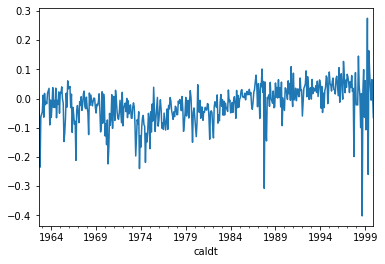

In [19]:
monthdf.loc['1962-01-01':'1999-12-31']['plottingval'].plot()
plt.show()

In [22]:
## We are now recreating the measure Lt - "The innovation in liquidity"
liq['lagvals']=liq.groupby('permno')['vals'].shift(1)

In [23]:
liq['diff']=liq['vals']-liq['lagvals']
liq

,vals,permno,caldt,lagvals,diff
0,5.330482e-01,10001,1986-09-30,NaN,NaN
1,4.991615e-02,10001,1986-10-31,5.330482e-01,-4.831320e-01
2,-1.580374e-01,10001,1986-11-30,4.991615e-02,-2.079535e-01
3,-1.390274e+00,10001,1986-12-31,-1.580374e-01,-1.232237e+00
4,-7.518338e-02,10001,1987-01-31,-1.390274e+00,1.315091e+00
...,...,...,...,...,...
3549131,-5.279940e-07,93436,2022-05-31,NaN,NaN
3549132,2.189319e-07,93436,2022-06-30,-5.279940e-07,7.469259e-07
3549133,3.855547e-08,93436,2022-07-31,2.189319e-07,-1.803764e-07
3549134,-2.491951e-07,93436,2022-08-31,3.855547e-08,-2.877506e-07


In [24]:
monthdf['delta_gamma']=(liq.groupby('caldt')['diff'].mean())*monthdf['m']
monthdf

,vals,mt,m,plottingval,delta_gamma
caldt,,,,,
1962-08-31,0.011638,3.255810e+08,1.005972,0.011707,0.046581
1962-09-30,-0.053053,3.235160e+08,0.999592,-0.053031,-0.035984
1962-10-31,-0.244977,3.099985e+08,0.957826,-0.234645,-0.134162
1962-11-30,-0.065033,3.141059e+08,0.970517,-0.063116,0.142304
1962-12-31,-0.051226,3.479098e+08,1.074963,-0.055066,-0.004033
...,...,...,...,...,...
2022-05-31,0.000915,5.218094e+10,161.227443,0.147467,0.384940
2022-06-30,0.000635,5.256506e+10,162.414269,0.103177,0.183145
2022-07-31,-0.000872,4.938732e+10,152.595769,-0.133136,-0.227139


In [25]:
monthdf['delta_gamma_lag']=monthdf['delta_gamma'].shift(1)
monthdf

,vals,mt,m,plottingval,delta_gamma,delta_gamma_lag
caldt,,,,,,
1962-08-31,0.011638,3.255810e+08,1.005972,0.011707,0.046581,NaN
1962-09-30,-0.053053,3.235160e+08,0.999592,-0.053031,-0.035984,0.046581
1962-10-31,-0.244977,3.099985e+08,0.957826,-0.234645,-0.134162,-0.035984
1962-11-30,-0.065033,3.141059e+08,0.970517,-0.063116,0.142304,-0.134162
1962-12-31,-0.051226,3.479098e+08,1.074963,-0.055066,-0.004033,0.142304
...,...,...,...,...,...,...
2022-05-31,0.000915,5.218094e+10,161.227443,0.147467,0.384940,-0.761619
2022-06-30,0.000635,5.256506e+10,162.414269,0.103177,0.183145,0.384940
2022-07-31,-0.000872,4.938732e+10,152.595769,-0.133136,-0.227139,0.183145


In [26]:
monthdf['gamma_lag']=monthdf['vals'].shift(1)
monthdf['gamma_lag_scaled']=monthdf['gamma_lag']*monthdf['m']
monthdf=monthdf.reset_index()
monthdf=monthdf.dropna()
monthdf

,caldt,vals,mt,m,plottingval,delta_gamma,delta_gamma_lag,gamma_lag,gamma_lag_scaled
1,1962-09-30,-0.053053,3.235160e+08,0.999592,-0.053031,-0.035984,0.046581,0.011638,0.011633
2,1962-10-31,-0.244977,3.099985e+08,0.957826,-0.234645,-0.134162,-0.035984,-0.053053,-0.050816
3,1962-11-30,-0.065033,3.141059e+08,0.970517,-0.063116,0.142304,-0.134162,-0.244977,-0.237754
4,1962-12-31,-0.051226,3.479098e+08,1.074963,-0.055066,-0.004033,0.142304,-0.065033,-0.069908
5,1963-01-31,-0.041654,3.525328e+08,1.089248,-0.045371,0.022551,-0.004033,-0.051226,-0.055798
...,...,...,...,...,...,...,...,...,...
717,2022-05-31,0.000915,5.218094e+10,161.227443,0.147467,0.384940,-0.761619,-0.003419,-0.551310
718,2022-06-30,0.000635,5.256506e+10,162.414269,0.103177,0.183145,0.384940,0.000915,0.148552
719,2022-07-31,-0.000872,4.938732e+10,152.595769,-0.133136,-0.227139,0.183145,0.000635,0.096940
720,2022-08-31,0.005111,5.439598e+10,168.071408,0.859055,0.068383,-0.227139,-0.000872,-0.146638


In [27]:
## Our function to get innovation in liquidity
def get_resid(x):
    reg=smf.ols('delta_gamma ~ 1 + delta_gamma_lag + gamma_lag_scaled',data=x).fit()
    return reg.resid*.01

In [28]:
monthdf

,caldt,vals,mt,m,plottingval,delta_gamma,delta_gamma_lag,gamma_lag,gamma_lag_scaled
1,1962-09-30,-0.053053,3.235160e+08,0.999592,-0.053031,-0.035984,0.046581,0.011638,0.011633
2,1962-10-31,-0.244977,3.099985e+08,0.957826,-0.234645,-0.134162,-0.035984,-0.053053,-0.050816
3,1962-11-30,-0.065033,3.141059e+08,0.970517,-0.063116,0.142304,-0.134162,-0.244977,-0.237754
4,1962-12-31,-0.051226,3.479098e+08,1.074963,-0.055066,-0.004033,0.142304,-0.065033,-0.069908
5,1963-01-31,-0.041654,3.525328e+08,1.089248,-0.045371,0.022551,-0.004033,-0.051226,-0.055798
...,...,...,...,...,...,...,...,...,...
717,2022-05-31,0.000915,5.218094e+10,161.227443,0.147467,0.384940,-0.761619,-0.003419,-0.551310
718,2022-06-30,0.000635,5.256506e+10,162.414269,0.103177,0.183145,0.384940,0.000915,0.148552
719,2022-07-31,-0.000872,4.938732e+10,152.595769,-0.133136,-0.227139,0.183145,0.000635,0.096940
720,2022-08-31,0.005111,5.439598e+10,168.071408,0.859055,0.068383,-0.227139,-0.000872,-0.146638


In [29]:
monthdf['Lt']=get_resid(monthdf)
monthdf

,caldt,vals,mt,m,plottingval,delta_gamma,delta_gamma_lag,gamma_lag,gamma_lag_scaled,Lt
1,1962-09-30,-0.053053,3.235160e+08,0.999592,-0.053031,-0.035984,0.046581,0.011638,0.011633,0.000027
2,1962-10-31,-0.244977,3.099985e+08,0.957826,-0.234645,-0.134162,-0.035984,-0.053053,-0.050816,-0.001401
3,1962-11-30,-0.065033,3.141059e+08,0.970517,-0.063116,0.142304,-0.134162,-0.244977,-0.237754,0.000272
4,1962-12-31,-0.051226,3.479098e+08,1.074963,-0.055066,-0.004033,0.142304,-0.065033,-0.069908,0.000099
5,1963-01-31,-0.041654,3.525328e+08,1.089248,-0.045371,0.022551,-0.004033,-0.051226,-0.055798,0.000194
...,...,...,...,...,...,...,...,...,...,...
717,2022-05-31,0.000915,5.218094e+10,161.227443,0.147467,0.384940,-0.761619,-0.003419,-0.551310,0.000104
718,2022-06-30,0.000635,5.256506e+10,162.414269,0.103177,0.183145,0.384940,0.000915,0.148552,0.003458
719,2022-07-31,-0.000872,4.938732e+10,152.595769,-0.133136,-0.227139,0.183145,0.000635,0.096940,-0.001235
720,2022-08-31,0.005111,5.439598e+10,168.071408,0.859055,0.068383,-0.227139,-0.000872,-0.146638,-0.000167


In [30]:
## Let's get started on replicating table 2:
## We need to get our predicted liquidity betas. we need to get back to df, lets make a copy so we don't worry about dropna
dfrep=df
dfrep

,permno,caldt,cusip,ticker,shrcd,excd,siccd,prc,ret,vol,shr,cumfacshr,vals,stock_val
0,10001,1986-09-30,39040610,GFGC,11,3,4920,6.375,-0.003077,366.0,991.0,3.0,5.330482e-01,6.317625e+03
1,10001,1986-10-31,39040610,GFGC,11,3,4920,6.625,0.039216,362.0,991.0,3.0,4.991615e-02,6.565375e+03
2,10001,1986-11-30,39040610,GFGC,11,3,4920,7.000,0.056604,312.0,991.0,3.0,-1.580374e-01,6.937000e+03
3,10001,1986-12-31,39040610,GFGC,11,3,4920,7.000,0.015000,312.0,991.0,3.0,-1.390274e+00,6.937000e+03
4,10001,1987-01-31,39040610,GFGC,11,3,4920,6.750,-0.035714,399.0,991.0,3.0,-7.518338e-02,6.689250e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534897,93436,2022-05-31,88160R10,TSLA,11,3,9999,758.260,-0.129197,6470840.0,1036010.0,3.0,-5.279940e-07,7.855649e+08
3534898,93436,2022-06-30,88160R10,TSLA,11,3,9999,673.420,-0.111888,6684630.0,1041000.0,3.0,2.189319e-07,7.010302e+08
3534899,93436,2022-07-31,88160R10,TSLA,11,3,9999,891.450,0.323765,5800690.0,1044490.0,3.0,3.855547e-08,9.311106e+08
3534900,93436,2022-08-31,88160R10,TSLA,11,3,9999,275.610,-0.072489,7322220.0,3133470.0,1.0,-2.491951e-07,8.636157e+08


In [36]:
## We need to bring in fama-french 3 factor data and merge it into df
path=r"C:\\Users\ericv\Downloads\F-F_Research_Data_Factors.CSV"
ff3=pd.read_csv(path,skiprows=3,nrows=1160)
ff3

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.56,-2.43,0.22
1,192608,2.64,-1.17,3.82,0.25
2,192609,0.36,-1.40,0.13,0.23
3,192610,-3.24,-0.09,0.70,0.32
4,192611,2.53,-0.10,-0.51,0.31
...,...,...,...,...,...
1155,202210,7.83,0.09,8.05,0.23
1156,202211,4.60,-3.40,1.38,0.29
1157,202212,-6.41,-0.68,1.32,0.33
1158,202301,6.65,5.02,-4.05,0.35


In [39]:
ff3.rename( columns={'Unnamed: 0':'caldt'}, inplace=True)
ff3['caldt']=pd.to_datetime(ff3['caldt'].astype(str).str[:4] + '-' + ff3['caldt'].astype(str).str[4:])
ff3['caldt']=ff3['caldt'] + pd.offsets.MonthEnd(0) 

In [40]:
dfrep=dfrep.merge(ff3, on='caldt')
dfrep

,permno,caldt,cusip,ticker,shrcd,excd,siccd,prc,ret,vol,shr,cumfacshr,vals,stock_val,Mkt-RF,SMB,HML,RF
0,10001,1986-09-30,39040610,GFGC,11,3,4920,6.375,-0.003077,366.0,991.0,3.0,0.533048,6317.625,-8.60,2.36,3.22,0.45
1,10003,1986-09-30,39031810,GCBK,11,3,6030,18.375,-0.057692,4989.0,2185.0,1.0,0.001693,40149.375,-8.60,2.36,3.22,0.45
2,10008,1986-09-30,36547310,GACO,10,3,3430,11.500,-0.155963,4147.0,2945.0,1.0,NaN,33867.500,-8.60,2.36,3.22,0.45
3,10009,1986-09-30,14979210,CAYB,11,3,6030,11.500,-0.092157,754.0,897.0,2.0,-0.017639,10315.500,-8.60,2.36,3.22,0.45
4,10016,1986-09-30,31682850,FIGIA,11,3,3560,49.000,-0.020000,2618.0,4591.0,3.0,0.000673,224959.000,-8.60,2.36,3.22,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531993,85762,1984-12-31,05902910,BBCM,11,3,6025,17.500,0.093750,5150.0,6325.0,2.0,NaN,110687.500,1.84,-0.56,-0.26,0.64
3531994,88373,1984-12-31,38086810,GCRA,18,3,6799,10.750,0.023810,546.0,1480.0,1.0,NaN,15910.000,1.84,-0.56,-0.26,0.64
3531995,89552,1984-12-31,52536910,PLIN,11,3,2834,13.125,-0.027778,2152.0,3470.0,1.5,-0.003203,45543.750,1.84,-0.56,-0.26,0.64
3531996,90617,1984-12-31,67061D10,NUTR,10,3,2024,9.250,-0.086420,2330.0,5303.0,1.0,-0.029870,49052.750,1.84,-0.56,-0.26,0.64


In [ ]:
## We need to run the regression that defines the 

In [29]:
## Let's create avg liquidity for each stock. This is given by:the average value of vals from months t-6 through t-1
## Redefine dfrep to be the relevant sample here. We need 
dfrep['liq_lag']=dfrep.groupby('permno')['vals'].shift(1)
dfrep['avg_liq']=dfrep.groupby('permno')['liq_lag'].rolling(6).mean().reset_index(drop=True)

,permno,caldt,cusip,ticker,shrcd,excd,siccd,prc,ret,vol,shr,cumfacshr,vals,stock_val,liq_lag,avg_liq
0,10001,1986-09-30,39040610,GFGC,11,3,4920,6.375,-0.003077,366.0,991.0,3.0,5.330482e-01,6.317625e+03,NaN,NaN
1,10001,1986-10-31,39040610,GFGC,11,3,4920,6.625,0.039216,362.0,991.0,3.0,4.991615e-02,6.565375e+03,5.330482e-01,NaN
2,10001,1986-11-30,39040610,GFGC,11,3,4920,7.000,0.056604,312.0,991.0,3.0,-1.580374e-01,6.937000e+03,4.991615e-02,NaN
3,10001,1986-12-31,39040610,GFGC,11,3,4920,7.000,0.015000,312.0,991.0,3.0,-1.390274e+00,6.937000e+03,-1.580374e-01,NaN
4,10001,1987-01-31,39040610,GFGC,11,3,4920,6.750,-0.035714,399.0,991.0,3.0,-7.518338e-02,6.689250e+03,-1.390274e+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534897,93436,2022-05-31,88160R10,TSLA,11,3,9999,758.260,-0.129197,6470840.0,1036010.0,3.0,-5.279940e-07,7.855649e+08,NaN,NaN
3534898,93436,2022-06-30,88160R10,TSLA,11,3,9999,673.420,-0.111888,6684630.0,1041000.0,3.0,2.189319e-07,7.010302e+08,-5.279940e-07,NaN
3534899,93436,2022-07-31,88160R10,TSLA,11,3,9999,891.450,0.323765,5800690.0,1044490.0,3.0,3.855547e-08,9.311106e+08,2.189319e-07,NaN
3534900,93436,2022-08-31,88160R10,TSLA,11,3,9999,275.610,-0.072489,7322220.0,3133470.0,1.0,-2.491951e-07,8.636157e+08,3.855547e-08,NaN


In [31]:
## The next is similar, but we need average log dollar volume in months t-6 through t-1
dfrep=dfrep.dropna()
dfrep['log_volume']=np.log(dfrep['vol']*dfrep['prc'])
dfrep['log_vol_lag']=dfrep.groupby('permno')['log_volume'].shift(1)
dfrep['avg_log_volume']=dfrep.groupby('permno')['log_vol_lag'].rolling(6).mean().reset_index(drop=True)

count    1.293489e+06
mean     1.292433e+01
std      2.360796e+00
min      6.271107e+00
25%      1.114463e+01
50%      1.275434e+01
75%      1.460418e+01
max      2.299766e+01
Name: avg_log_volume, dtype: float64

In [32]:
## Now we need cumulative return of a stock in months t-6 through t-1
dfrep['ret_lag']=dfrep.groupby('permno')['ret'].shift(1)
dfrep['cumulative_ret']=dfrep.groupby('permno')['ret_lag'].rolling(6).sum().reset_index(drop=True)

count    1.293489e+06
mean     5.998498e-02
std      2.741897e-01
min     -2.214738e+00
25%     -7.150420e-02
50%      5.521180e-02
75%      1.878909e-01
max      6.480810e+00
Name: cumulative_ret, dtype: float64

In [33]:
## Similar, but we want rolling standard deviation
dfrep['ret_std']=dfrep.groupby('permno')['ret'].apply(lambda x : x.rolling(6).std()).reset_index(drop=True)

,permno,caldt,cusip,ticker,shrcd,excd,siccd,prc,ret,vol,...,vals,stock_val,liq_lag,avg_liq,log_volume,log_vol_lag,avg_log_volume,ret_lag,cumulative_ret,ret_std
6,10001,1987-03-31,39040610,GFGC,11,3,4920,6.375,0.036800,216.0,...,1.773907e+00,6.317625e+03,1.140198e+00,1.661118e-02,7.227662,NaN,7.789019,NaN,0.405110,0.114598
31,10001,1989-04-30,39040610,GFGC,11,3,4920,7.250,0.074074,310.0,...,1.592953e+00,7.235500e+03,-6.703834e-01,-2.118906e-01,7.717574,7.227662,8.568570,0.036800,-0.112957,0.114284
32,10001,1989-05-31,39040610,GFGC,11,3,4920,7.000,-0.034483,629.0,...,-1.441798e-01,6.986000e+03,1.592953e+00,-1.676020e-01,8.390041,7.717574,8.800417,0.074074,-0.415696,0.118851
33,10001,1989-06-30,39040610,GFGC,11,3,4920,7.000,0.017143,200.0,...,-4.580533e-01,7.007000e+03,-1.441798e-01,-2.832651e-01,7.244228,8.390041,8.828907,-0.034483,-0.373378,0.130826
34,10001,1989-07-31,39040610,GFGC,11,3,4920,7.250,0.035714,185.0,...,1.254428e+00,7.257250e+03,-4.580533e-01,-1.454364e-01,7.201357,7.244228,8.902129,0.017143,-0.186982,0.132591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534887,93436,2021-06-30,88160R10,TSLA,11,3,9999,679.700,0.087137,5186810.0,...,-5.263158e-07,6.688268e+08,-1.015594e-06,-5.271334e-07,21.983281,22.084828,NaN,-0.118713,NaN,NaN
3534888,93436,2021-07-31,88160R10,TSLA,11,3,9999,687.200,0.011034,4472790.0,...,2.458571e-07,6.803383e+08,-5.263158e-07,-5.048636e-07,21.846148,21.983281,NaN,0.087137,NaN,NaN
3534889,93436,2021-08-31,88160R10,TSLA,11,3,9999,735.720,0.070605,3812160.0,...,7.879404e-07,7.370222e+08,2.458571e-07,-4.169335e-07,21.754556,21.846148,NaN,0.011034,NaN,NaN
3534890,93436,2021-09-30,88160R10,TSLA,11,3,9999,775.480,0.054042,3889230.0,...,-3.212451e-07,7.785819e+08,7.879404e-07,-1.716279e-07,21.827204,21.754556,NaN,0.070605,NaN,NaN


In [37]:
## Lag of log price
dfrep['log_price']=np.log(dfrep['prc'])
dfrep['log_price_lag']=dfrep.groupby('permno')['log_price'].shift(1)

,permno,caldt,cusip,ticker,shrcd,excd,siccd,prc,ret,vol,...,liq_lag,avg_liq,log_volume,log_vol_lag,avg_log_volume,ret_lag,cumulative_ret,ret_std,log_price,log_price_lag
6,10001,1987-03-31,39040610,GFGC,11,3,4920,6.375,0.036800,216.0,...,1.140198e+00,1.661118e-02,7.227662,NaN,7.789019,NaN,0.405110,0.114598,1.852384,NaN
31,10001,1989-04-30,39040610,GFGC,11,3,4920,7.250,0.074074,310.0,...,-6.703834e-01,-2.118906e-01,7.717574,7.227662,8.568570,0.036800,-0.112957,0.114284,1.981001,1.852384
32,10001,1989-05-31,39040610,GFGC,11,3,4920,7.000,-0.034483,629.0,...,1.592953e+00,-1.676020e-01,8.390041,7.717574,8.800417,0.074074,-0.415696,0.118851,1.945910,1.981001
33,10001,1989-06-30,39040610,GFGC,11,3,4920,7.000,0.017143,200.0,...,-1.441798e-01,-2.832651e-01,7.244228,8.390041,8.828907,-0.034483,-0.373378,0.130826,1.945910,1.945910
34,10001,1989-07-31,39040610,GFGC,11,3,4920,7.250,0.035714,185.0,...,-4.580533e-01,-1.454364e-01,7.201357,7.244228,8.902129,0.017143,-0.186982,0.132591,1.981001,1.945910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534887,93436,2021-06-30,88160R10,TSLA,11,3,9999,679.700,0.087137,5186810.0,...,-1.015594e-06,-5.271334e-07,21.983281,22.084828,NaN,-0.118713,NaN,NaN,6.521652,6.438104
3534888,93436,2021-07-31,88160R10,TSLA,11,3,9999,687.200,0.011034,4472790.0,...,-5.263158e-07,-5.048636e-07,21.846148,21.983281,NaN,0.087137,NaN,NaN,6.532625,6.521652
3534889,93436,2021-08-31,88160R10,TSLA,11,3,9999,735.720,0.070605,3812160.0,...,2.458571e-07,-4.169335e-07,21.754556,21.846148,NaN,0.011034,NaN,NaN,6.600850,6.532625
3534890,93436,2021-09-30,88160R10,TSLA,11,3,9999,775.480,0.054042,3889230.0,...,7.879404e-07,-1.716279e-07,21.827204,21.754556,NaN,0.070605,NaN,NaN,6.653482,6.600850


In [40]:
## Similar but for shares outstanding
dfrep=dfrep.dropna()
dfrep=dfrep.query("shr>0").reset_index(drop=True)
dfrep['log_shares']=np.log(dfrep['shr'])
dfrep['log_shares_lag']=dfrep.groupby('permno')['log_shares'].shift(1)